In [101]:
import os
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [51]:
import os
import yaml
import pandas as pd

root_folder = "/home/shigilsasi/code/Guvi_Projects/Stock_Analysis/data"

all_data = []

# Loop through each month folder
for month_folder in os.listdir(root_folder):

    full_month_path = os.path.join(root_folder, month_folder)

    # Ensure it's a folder
    if os.path.isdir(full_month_path):

        # Loop through YAML files inside the month folder
        for file in os.listdir(full_month_path):
            if file.endswith(".yaml") or file.endswith(".yml"):
                
                file_path = os.path.join(full_month_path, file)

                with open(file_path, "r") as f:
                    data = yaml.safe_load(f)

                df = pd.DataFrame(data)

                # Add month & file as metadata (optional)
                df["month"] = month_folder
                df["source_file"] = file

                all_data.append(df)

# Combine everything
final_df = pd.concat(all_data, ignore_index=True)

# Save to CSV
output_path = "/home/shigilsasi/code/Guvi_Projects/Stock_Analysis/all_stock_data.csv"
final_df.to_csv(output_path, index=False)


print(final_df.head())


       Ticker    close                 date     high      low    month  \
0        SBIN   642.75  2024-01-04 05:30:00   646.40   638.65  2024-01   
1  BAJFINANCE  7705.55  2024-01-04 05:30:00  7733.95  7560.00  2024-01   
2       TITAN  3719.70  2024-01-04 05:30:00  3727.00  3686.65  2024-01   
3         ITC   476.40  2024-01-04 05:30:00   481.45   474.20  2024-01   
4         TCS  3666.80  2024-01-04 05:30:00  3719.00  3651.00  2024-01   

      open    volume               source_file  
0   642.50  13883388  2024-01-04_05-30-00.yaml  
1  7560.00   2911879  2024-01-04_05-30-00.yaml  
2  3696.00    545228  2024-01-04_05-30-00.yaml  
3   480.00  11786959  2024-01-04_05-30-00.yaml  
4  3701.75   3598144  2024-01-04_05-30-00.yaml  


In [52]:
final_df.head()

,Ticker,close,date,high,low,month,open,volume,source_file
0,SBIN,642.75,2024-01-04 05:30:00,646.40,638.65,2024-01,642.50,13883388,2024-01-04_05-30-00.yaml
1,BAJFINANCE,7705.55,2024-01-04 05:30:00,7733.95,7560.00,2024-01,7560.00,2911879,2024-01-04_05-30-00.yaml
2,TITAN,3719.70,2024-01-04 05:30:00,3727.00,3686.65,2024-01,3696.00,545228,2024-01-04_05-30-00.yaml
3,ITC,476.40,2024-01-04 05:30:00,481.45,474.20,2024-01,480.00,11786959,2024-01-04_05-30-00.yaml
4,TCS,3666.80,2024-01-04 05:30:00,3719.00,3651.00,2024-01,3701.75,3598144,2024-01-04_05-30-00.yaml


In [53]:
final_df.drop("source_file", axis=1, inplace=True)

In [54]:
final_df.head()

,Ticker,close,date,high,low,month,open,volume
0,SBIN,642.75,2024-01-04 05:30:00,646.40,638.65,2024-01,642.50,13883388
1,BAJFINANCE,7705.55,2024-01-04 05:30:00,7733.95,7560.00,2024-01,7560.00,2911879
2,TITAN,3719.70,2024-01-04 05:30:00,3727.00,3686.65,2024-01,3696.00,545228
3,ITC,476.40,2024-01-04 05:30:00,481.45,474.20,2024-01,480.00,11786959
4,TCS,3666.80,2024-01-04 05:30:00,3719.00,3651.00,2024-01,3701.75,3598144


In [55]:
final_df.shape

(14200, 8)

In [56]:
ticker_unique = final_df['Ticker'].unique()
ticker_unique

array(['SBIN', 'BAJFINANCE', 'TITAN', 'ITC', 'TCS', 'LT', 'TATACONSUM',
       'RELIANCE', 'HCLTECH', 'JSWSTEEL', 'ULTRACEMCO', 'POWERGRID',
       'INFY', 'TRENT', 'BHARTIARTL', 'TATAMOTORS', 'WIPRO', 'TECHM',
       'NTPC', 'HINDUNILVR', 'APOLLOHOSP', 'M&M', 'GRASIM', 'ICICIBANK',
       'ADANIENT', 'ADANIPORTS', 'BEL', 'BAJAJFINSV', 'EICHERMOT',
       'COALINDIA', 'MARUTI', 'INDUSINDBK', 'ASIANPAINT', 'TATASTEEL',
       'HDFCLIFE', 'DRREDDY', 'SUNPHARMA', 'KOTAKBANK', 'SHRIRAMFIN',
       'NESTLEIND', 'ONGC', 'CIPLA', 'BPCL', 'BRITANNIA', 'SBILIFE',
       'HINDALCO', 'HEROMOTOCO', 'AXISBANK', 'HDFCBANK', 'BAJAJ-AUTO'],
      dtype=object)

In [57]:
# for each ticker get the data and save it to a csv file
for i in ticker_unique:
    df = final_df[final_df['Ticker'] == i]
    df.to_csv(f'/home/shigilsasi/code/Guvi_Projects/Stock_Analysis/data/{i}.csv', index=False)




In [58]:
final_df.head()

,Ticker,close,date,high,low,month,open,volume
0,SBIN,642.75,2024-01-04 05:30:00,646.40,638.65,2024-01,642.50,13883388
1,BAJFINANCE,7705.55,2024-01-04 05:30:00,7733.95,7560.00,2024-01,7560.00,2911879
2,TITAN,3719.70,2024-01-04 05:30:00,3727.00,3686.65,2024-01,3696.00,545228
3,ITC,476.40,2024-01-04 05:30:00,481.45,474.20,2024-01,480.00,11786959
4,TCS,3666.80,2024-01-04 05:30:00,3719.00,3651.00,2024-01,3701.75,3598144


In [59]:
final_df.describe()

,close,high,low,open,volume
count,14200.000000,14200.000000,14200.000000,14200.000000,1.420000e+04
mean,2449.415380,2476.495940,2422.374544,2450.982693,6.833475e+06
std,2573.791109,2601.744121,2545.346794,2575.276197,1.129303e+07
min,116.600000,118.550000,114.600000,114.600000,5.987000e+03
25%,821.850000,831.900000,814.500000,824.775000,9.636955e+05
50%,1508.175000,1523.875000,1493.315000,1510.000000,2.446882e+06
75%,3101.762500,3138.150000,3066.062500,3101.837500,8.592909e+06
max,13495.600000,13680.000000,13274.450000,13393.000000,2.680527e+08


In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  14200 non-null  object 
 1   close   14200 non-null  float64
 2   date    14200 non-null  object 
 3   high    14200 non-null  float64
 4   low     14200 non-null  float64
 5   month   14200 non-null  object 
 6   open    14200 non-null  float64
 7   volume  14200 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 887.6+ KB


In [61]:
# need to change the date column to datetime
final_df['date'] = pd.to_datetime(final_df['date'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Ticker  14200 non-null  object        
 1   close   14200 non-null  float64       
 2   date    14200 non-null  datetime64[ns]
 3   high    14200 non-null  float64       
 4   low     14200 non-null  float64       
 5   month   14200 non-null  object        
 6   open    14200 non-null  float64       
 7   volume  14200 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 887.6+ KB


In [62]:
final_df.isnull().sum()

Ticker    0
close     0
date      0
high      0
low       0
month     0
open      0
volume    0
dtype: int64

In [63]:
final_df.duplicated().sum()

np.int64(0)

In [64]:
final_df.head()

,Ticker,close,date,high,low,month,open,volume
0,SBIN,642.75,2024-01-04 05:30:00,646.40,638.65,2024-01,642.50,13883388
1,BAJFINANCE,7705.55,2024-01-04 05:30:00,7733.95,7560.00,2024-01,7560.00,2911879
2,TITAN,3719.70,2024-01-04 05:30:00,3727.00,3686.65,2024-01,3696.00,545228
3,ITC,476.40,2024-01-04 05:30:00,481.45,474.20,2024-01,480.00,11786959
4,TCS,3666.80,2024-01-04 05:30:00,3719.00,3651.00,2024-01,3701.75,3598144


In [65]:
final_df.columns

Index(['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume'], dtype='object')

In [66]:
# need to save the data as nifty_50.csv
final_df.to_csv('/home/shigilsasi/code/Guvi_Projects/Stock_Analysis/data/nifty_50.csv', index=False)

In [67]:
# need to split the year in date column
final_df['year'] = final_df['date'].dt.year
final_df.head()

,Ticker,close,date,high,low,month,open,volume,year
0,SBIN,642.75,2024-01-04 05:30:00,646.40,638.65,2024-01,642.50,13883388,2024
1,BAJFINANCE,7705.55,2024-01-04 05:30:00,7733.95,7560.00,2024-01,7560.00,2911879,2024
2,TITAN,3719.70,2024-01-04 05:30:00,3727.00,3686.65,2024-01,3696.00,545228,2024
3,ITC,476.40,2024-01-04 05:30:00,481.45,474.20,2024-01,480.00,11786959,2024
4,TCS,3666.80,2024-01-04 05:30:00,3719.00,3651.00,2024-01,3701.75,3598144,2024


In [68]:
final_df.columns

Index(['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume',
       'year'],
      dtype='object')

In [69]:
final_df['year'].unique()   

array([2024, 2023], dtype=int32)

In [70]:
final_df = final_df.sort_values(['Ticker', 'date'])
final_df

,Ticker,close,date,high,low,month,open,volume,year
9274,ADANIENT,2387.25,2023-10-03 05:30:00,2424.90,2372.00,2023-10,2418.00,2019899,2023
9324,ADANIENT,2464.95,2023-10-04 05:30:00,2502.75,2392.25,2023-10,2402.20,2857377,2023
9574,ADANIENT,2466.35,2023-10-05 05:30:00,2486.50,2446.40,2023-10,2477.95,1132455,2023
9474,ADANIENT,2478.10,2023-10-06 05:30:00,2514.95,2466.05,2023-10,2466.35,1510035,2023
9674,ADANIENT,2442.60,2023-10-09 05:30:00,2459.70,2411.30,2023-10,2440.00,1408224,2023
...,...,...,...,...,...,...,...,...,...
2766,WIPRO,566.70,2024-11-14 05:30:00,574.55,564.20,2024-11,568.95,4891760,2024
2366,WIPRO,552.85,2024-11-18 05:30:00,566.70,540.30,2024-11,566.70,7644882,2024
2716,WIPRO,562.00,2024-11-19 05:30:00,569.80,554.70,2024-11,556.00,6459889,2024
2566,WIPRO,557.15,2024-11-21 05:30:00,567.60,555.30,2024-11,562.00,5836304,2024


In [71]:
df_2024 = final_df[final_df['year'] == 2024]
df_2024.head()

,Ticker,close,date,high,low,month,open,volume,year
1074,ADANIENT,2917.2,2024-01-01 05:30:00,2947.00,2842.05,2024-01,2852.30,2898619,2024
774,ADANIENT,2932.4,2024-01-02 05:30:00,2948.20,2841.00,2024-01,2922.00,2671368,2024
824,ADANIENT,3003.0,2024-01-03 05:30:00,3199.00,2955.60,2024-01,3047.00,19725411,2024
24,ADANIENT,2998.3,2024-01-04 05:30:00,3044.45,2990.00,2024-01,3039.40,2975620,2024
474,ADANIENT,3006.6,2024-01-05 05:30:00,3066.90,2981.10,2024-01,3009.95,3219949,2024


/tmp/ipykernel_23377/3440004071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['daily_returns'] = (


        Ticker  volatility
0     ADANIENT    0.027894
1   ADANIPORTS    0.025839
8          BEL    0.024814
47       TRENT    0.024524
34        ONGC    0.024115
10        BPCL    0.023276
39  SHRIRAMFIN    0.022073
13   COALINDIA    0.022069
21    HINDALCO    0.020871
24  INDUSINDBK    0.020504


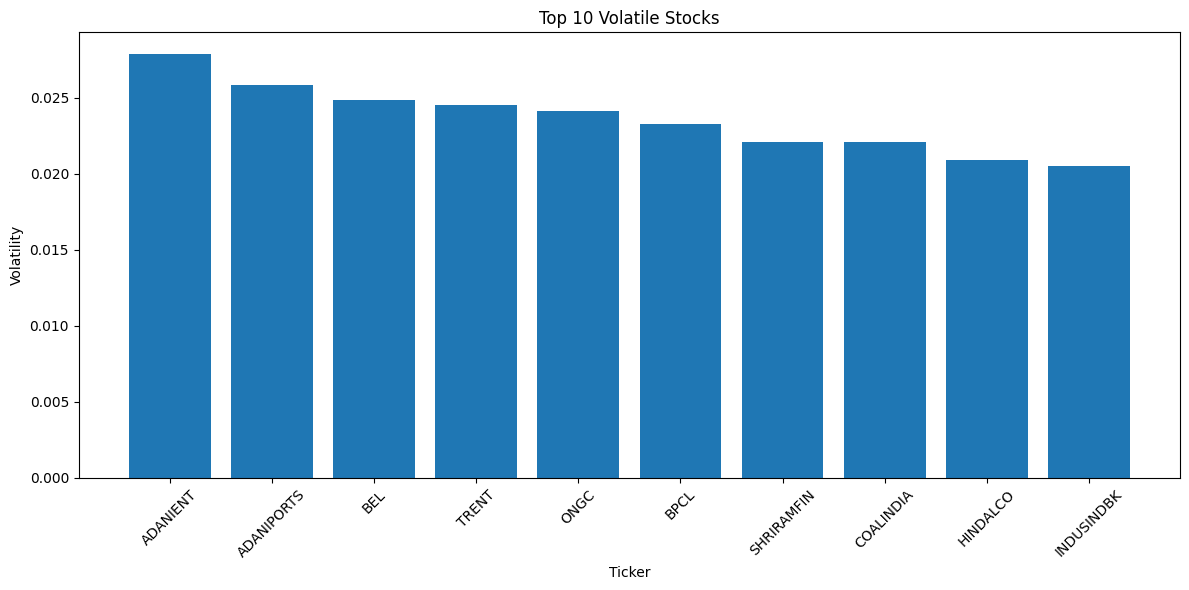

In [72]:
# 1. Calaculate the daily returns
df_2024['daily_returns'] = (
    df_2024.groupby('Ticker')['close'].pct_change()
)

# Calaculate the volatitlity (standard deviation)
volatitlity_df = (
    df_2024.groupby('Ticker')['daily_returns'].std().reset_index().rename(columns={'daily_returns': 'volatility'})
)

# Select top 10 most volatile stocks
top_10 = volatitlity_df.sort_values('volatility', ascending=False).head(10)
print(top_10)

# Visualization - Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(top_10['Ticker'], top_10['volatility'])
plt.xlabel('Ticker')
plt.ylabel('Volatility')
plt.title('Top 10 Volatile Stocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
df_2024

,Ticker,close,date,high,low,month,open,volume,year,daily_returns
1074,ADANIENT,2917.20,2024-01-01 05:30:00,2947.00,2842.05,2024-01,2852.30,2898619,2024,NaN
774,ADANIENT,2932.40,2024-01-02 05:30:00,2948.20,2841.00,2024-01,2922.00,2671368,2024,0.005210
824,ADANIENT,3003.00,2024-01-03 05:30:00,3199.00,2955.60,2024-01,3047.00,19725411,2024,0.024076
24,ADANIENT,2998.30,2024-01-04 05:30:00,3044.45,2990.00,2024-01,3039.40,2975620,2024,-0.001565
474,ADANIENT,3006.60,2024-01-05 05:30:00,3066.90,2981.10,2024-01,3009.95,3219949,2024,0.002768
...,...,...,...,...,...,...,...,...,...,...
2766,WIPRO,566.70,2024-11-14 05:30:00,574.55,564.20,2024-11,568.95,4891760,2024,-0.004042
2366,WIPRO,552.85,2024-11-18 05:30:00,566.70,540.30,2024-11,566.70,7644882,2024,-0.024440
2716,WIPRO,562.00,2024-11-19 05:30:00,569.80,554.70,2024-11,556.00,6459889,2024,0.016551
2566,WIPRO,557.15,2024-11-21 05:30:00,567.60,555.30,2024-11,562.00,5836304,2024,-0.008630


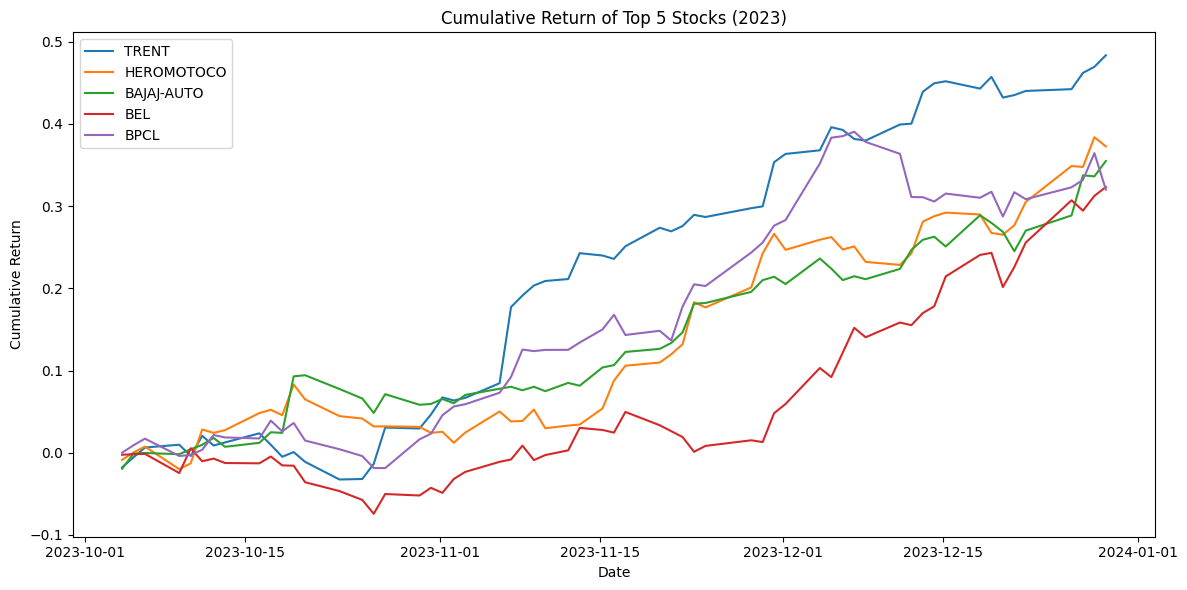

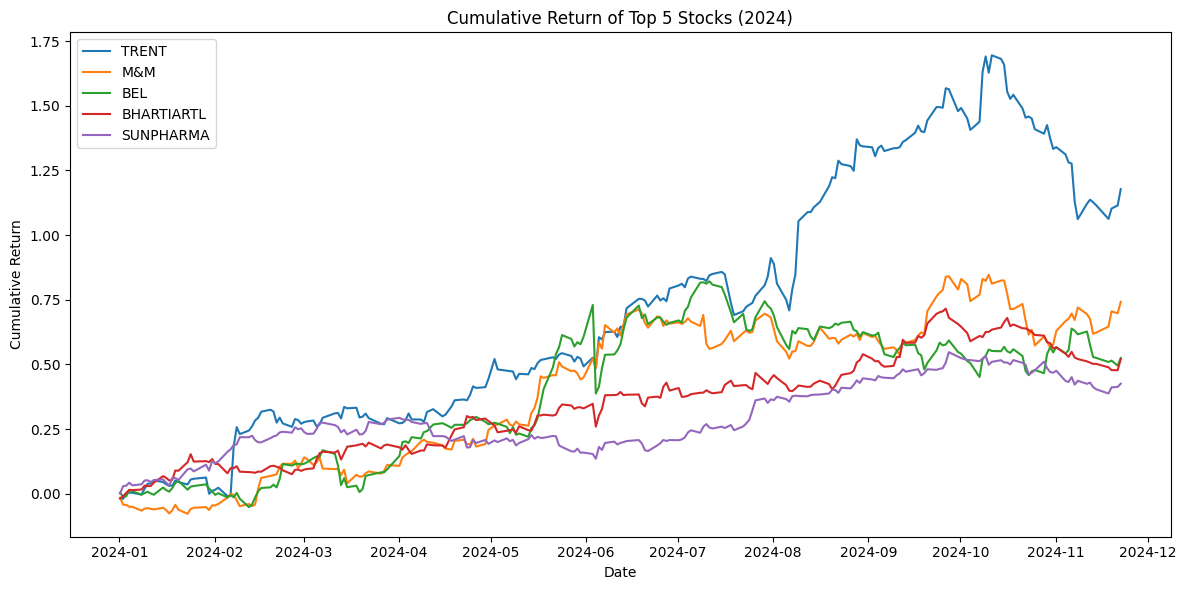

In [74]:
# 2. Cumulative Returns Over time

final_df['daily_return'] = (
    final_df.groupby('Ticker')['close']
      .pct_change()
)

# Calculate cumulative returns(All Years)

final_df['cumulative_return'] = (
    final_df.groupby(['Ticker', 'year'])['daily_return']
      .transform(lambda x: (1 + x).cumprod() - 1)
)

years = final_df['year'].unique()

for yr in sorted(years):
    df_year = final_df[final_df['year'] == yr]

    # Get top 5 stocks based on final cumulative return
    top_5 = (
        df_year
        .groupby('Ticker')['cumulative_return']
        .last()
        .sort_values(ascending=False)
        .head(5)
        .index
    )

    # Plot
    plt.figure(figsize=(12, 6))

    for ticker in top_5:
        stock_data = df_year[df_year['Ticker'] == ticker]
        plt.plot(
            stock_data['date'],
            stock_data['cumulative_return'],
            label=ticker
        )

    plt.title(f'Cumulative Return of Top 5 Stocks ({yr})')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.tight_layout()
    plt.show()



In [75]:
final_df['Ticker'].unique()

array(['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BEL', 'BHARTIARTL',
       'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT',
       'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO',
       'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'ITC',
       'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND',
       'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBILIFE', 'SBIN',
       'SHRIRAMFIN', 'SUNPHARMA', 'TATACONSUM', 'TATAMOTORS', 'TATASTEEL',
       'TCS', 'TECHM', 'TITAN', 'TRENT', 'ULTRACEMCO', 'WIPRO'],
      dtype=object)

In [83]:
# 3. Sector-wise Performance:
# Load sector data
sector_df = pd.read_csv('/home/shigilsasi/code/Guvi_Projects/Stock_Analysis/Sector_data - Sheet1.csv')
sector_df.head()

,COMPANY,sector,Symbol
0,ADANI ENTERPRISES,MISCELLANEOUS,ADANI ENTERPRISES: ADANIGREEN
1,ADANI PORTS & SEZ,MISCELLANEOUS,ADANI PORTS & SEZ: ADANIPORTS
2,APOLLO HOSPITALS,MISCELLANEOUS,APOLLO HOSPITALS: APOLLOHOSP
3,ASIAN PAINTS,PAINTS,ASIAN PAINTS: ASIANPAINT
4,AXIS BANK,BANKING,AXIS BANK: AXISBANK


In [85]:
# Clean the Symbol Column
sector_df['Ticker'] = sector_df['Symbol'].str.split(':').str[-1].str.strip()
sector_df.head()

,COMPANY,sector,Symbol,Ticker
0,ADANI ENTERPRISES,MISCELLANEOUS,ADANI ENTERPRISES: ADANIGREEN,ADANIGREEN
1,ADANI PORTS & SEZ,MISCELLANEOUS,ADANI PORTS & SEZ: ADANIPORTS,ADANIPORTS
2,APOLLO HOSPITALS,MISCELLANEOUS,APOLLO HOSPITALS: APOLLOHOSP,APOLLOHOSP
3,ASIAN PAINTS,PAINTS,ASIAN PAINTS: ASIANPAINT,ASIANPAINT
4,AXIS BANK,BANKING,AXIS BANK: AXISBANK,AXISBANK


In [86]:
sector_df['Ticker'] = sector_df['Symbol'].str.split(':').str[-1].str.strip()
sector_df.head()


,COMPANY,sector,Symbol,Ticker
0,ADANI ENTERPRISES,MISCELLANEOUS,ADANI ENTERPRISES: ADANIGREEN,ADANIGREEN
1,ADANI PORTS & SEZ,MISCELLANEOUS,ADANI PORTS & SEZ: ADANIPORTS,ADANIPORTS
2,APOLLO HOSPITALS,MISCELLANEOUS,APOLLO HOSPITALS: APOLLOHOSP,APOLLOHOSP
3,ASIAN PAINTS,PAINTS,ASIAN PAINTS: ASIANPAINT,ASIANPAINT
4,AXIS BANK,BANKING,AXIS BANK: AXISBANK,AXISBANK


In [87]:
# Merge Stock Data with Sector Data
final_df = pd.merge(final_df, sector_df[['Ticker', 'sector']], on='Ticker', how='left')
final_df.head()

,Ticker,close,date,high,low,month,open,volume,year,daily_return,cumulative_return,sector
0,ADANIENT,2387.25,2023-10-03 05:30:00,2424.90,2372.00,2023-10,2418.00,2019899,2023,NaN,NaN,NaN
1,ADANIENT,2464.95,2023-10-04 05:30:00,2502.75,2392.25,2023-10,2402.20,2857377,2023,0.032548,0.032548,NaN
2,ADANIENT,2466.35,2023-10-05 05:30:00,2486.50,2446.40,2023-10,2477.95,1132455,2023,0.000568,0.033134,NaN
3,ADANIENT,2478.10,2023-10-06 05:30:00,2514.95,2466.05,2023-10,2466.35,1510035,2023,0.004764,0.038056,NaN
4,ADANIENT,2442.60,2023-10-09 05:30:00,2459.70,2411.30,2023-10,2440.00,1408224,2023,-0.014325,0.023186,NaN


In [88]:
# Calculate Yearly Return per Stock
yearly_return = (
    final_df.groupby(['Ticker', 'year'])
    .agg(
        first_close = ('close', 'first'),
        last_close = ('close', 'last'),
        sector = ('sector', 'first')
    )
    .reset_index()
)

yearly_return['yearly_return %'] = (
    (yearly_return['last_close'] - yearly_return['first_close']) / yearly_return['first_close']
) * 100

In [91]:
# Calculate Average Yearly Return by Sector
sector_performance_year = (
    yearly_return.groupby(['sector', 'year'])['yearly_return %']
    .mean()
    .reset_index()
)

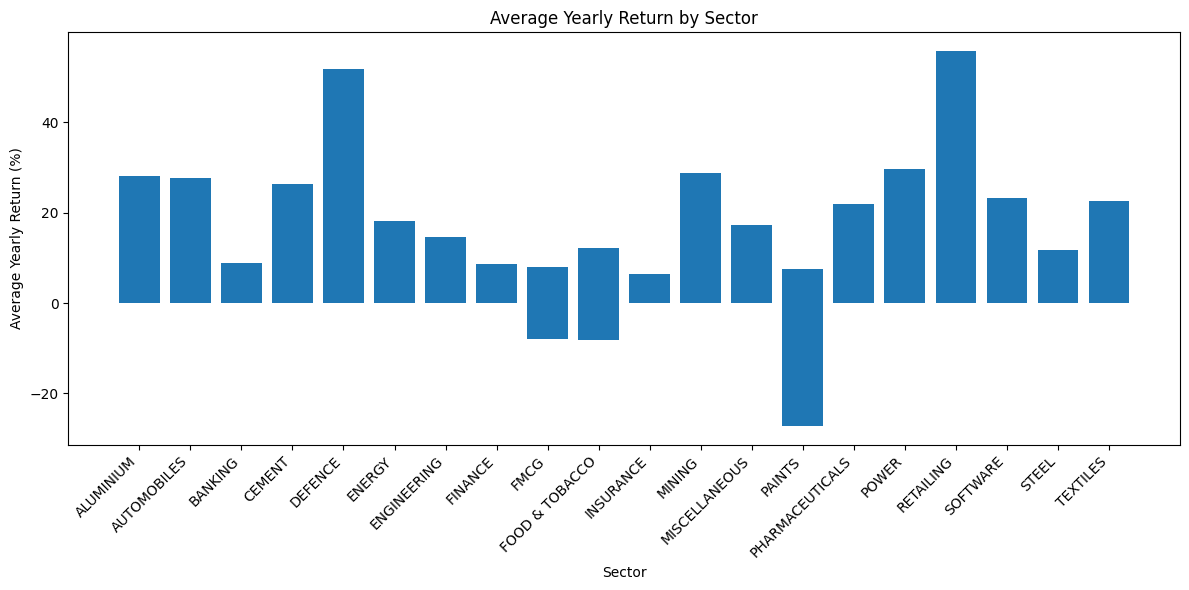

In [95]:
# Visualization – Sector-wise Bar Chart
plt.figure(figsize=(12,6))
plt.bar(sector_performance_year['sector'], sector_performance_year['yearly_return %'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sector')
plt.ylabel('Average Yearly Return (%)')
plt.title('Average Yearly Return by Sector')
plt.tight_layout()
plt.show()

In [96]:
final_df.columns

Index(['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume',
       'year', 'daily_return', 'cumulative_return', 'sector'],
      dtype='object')

In [97]:
# 4. Stock Price Correlation

returns_pivot = final_df.pivot_table(
    index = 'date',
    columns = 'Ticker',
    values = 'daily_return'
)

In [99]:
# Calculate Correlation Matrix
corr_matrix = returns_pivot.corr()

In [104]:
# Plot Correlation Heatmap

import plotly.express as px

fig = px.imshow(
    corr_matrix,
    color_continuous_scale='RdBu',
    zmin=-1,
    zmax=1,
    labels = dict(x='Ticker', y='Ticker', color='Correlation'),
    title='Stock Price Correlation Heatmap'
)

fig.update_layout(
    width=1200,
    height=800,
    xaxis_title='Ticker',
    yaxis_title='Ticker'
)

fig.show()

In [116]:
# 5. Top 5 Gainers and Losers (Month-wise)

monthly_return = (
    final_df.groupby(['year', 'month', 'Ticker'])
    .agg(
        first_close = ('close', 'first'),
        last_close = ('close', 'last'),
    )
    .reset_index()
)

monthly_return['monthly_return_%'] = (
    (monthly_return['last_close'] - monthly_return['first_close']) / monthly_return['first_close']
) * 100


In [117]:
# Dashboard-Style Visualization

import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [121]:
# Add Top 5 Gainers & Losers per Month

for yr in sorted(monthly_return['year'].unique()):

    data_year = monthly_return[monthly_return['year'] == yr]

    months_list = (
        data_year[['month']]
        .drop_duplicates()
        .sort_values('month')['month']
        .tolist()
    )

    fig = make_subplots(
        rows=4,
        cols=3,
        subplot_titles=[f"{mon} {yr}" for mon in months_list]
    )

    row, col = 1, 1

    for mon in months_list:
        data = data_year[data_year['month'] == mon]

        top_gainers = data.sort_values('monthly_return_%', ascending=False).head(5)
        top_losers = data.sort_values('monthly_return_%').head(5)

        combined = pd.concat([top_gainers, top_losers])

        fig.add_trace(
            go.Bar(
                x=combined['Ticker'],
                y=combined['monthly_return_%'],
                text=combined['monthly_return_%'].round(2),
                textposition='outside'
            ),
            row=row,
            col=col
        )

        col += 1
        if col > 3:
            col = 1
            row += 1

    fig.update_layout(
        title=f"Top 5 Gainers and Losers by Month – {yr}",
        height=1200,
        showlegend=False
    )

    fig.add_hline(y=0)
    fig.show()